# Capital Asset Pricing Model (CAPM)

In [4]:
from scipy import stats
import pandas as pd
import pandas_datareader as web
import datetime

In [9]:
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2018,1,1)

In [10]:
spy_etf = web.DataReader('SPY','iex',start,end)

In [11]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 755 entries, 2015-01-02 to 2017-12-29
Data columns (total 5 columns):
open      755 non-null float64
high      755 non-null float64
low       755 non-null float64
close     755 non-null float64
volume    755 non-null int64
dtypes: float64(4), int64(1)
memory usage: 35.4+ KB


In [12]:
spy_etf.head()

,open,high,low,close,volume
date,,,,,
2015-01-02,191.6852,192.1496,189.6419,190.8029,121465865
2015-01-05,189.6326,189.8184,187.0134,187.3570,169632646
2015-01-06,187.7007,188.2858,184.6960,185.5923,209151408
2015-01-07,187.0784,188.2858,186.5768,187.9050,125346709
2015-01-08,189.4840,191.4809,189.4654,191.2394,147217784


In [13]:
aapl = web.DataReader('AAPL','iex',start,end)

In [14]:
aapl.head()

,open,high,low,close,volume
date,,,,,
2015-01-02,104.2471,104.2939,100.4662,102.3192,53204626
2015-01-05,101.3459,101.6828,98.6506,99.4367,64285491
2015-01-06,99.7082,100.5411,97.9206,99.4461,65797116
2015-01-07,100.3258,101.2617,99.8532,100.8406,40105934
2015-01-08,102.2257,104.9584,101.7296,104.7151,59364547


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

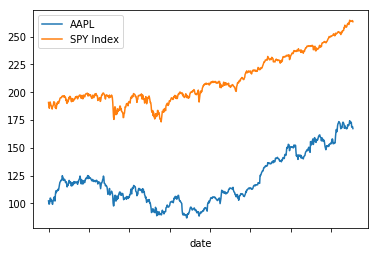

In [16]:
aapl['close'].plot(label='AAPL')
spy_etf['close'].plot(label='SPY Index')
plt.legend()

In [17]:
# cumulative return
aapl['cumulative'] = aapl['close']/aapl['close'].iloc[0]
spy_etf['cumulative'] = spy_etf['close']/spy_etf['close'].iloc[0]

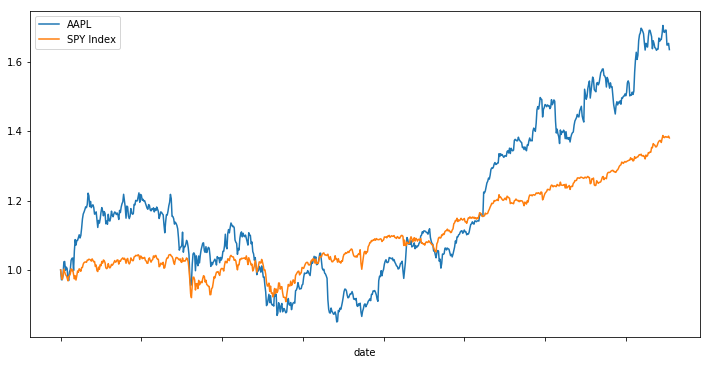

In [18]:
aapl['cumulative'].plot(label='AAPL',figsize=(12,6))
spy_etf['cumulative'].plot(label='SPY Index',figsize=(12,6))
plt.legend()

In [19]:
# daily return
aapl['daily'] = aapl['close'].pct_change(1)
spy_etf['daily'] = spy_etf['close'].pct_change(1)

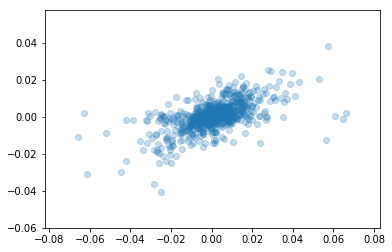

In [20]:
plt.scatter(aapl['daily'],spy_etf['daily'],alpha=0.25)

In [21]:
beta,alpha,r_value,p_value,std_err = stats.linregress(
    aapl['daily'].iloc[1:],
    spy_etf['daily'].iloc[1:]
)

In [22]:
beta

0.3204656125174955

In [23]:
alpha

0.00021511924056857534

In [24]:
r_value

0.59985600457570276

In [25]:
import numpy as np

In [26]:
noise = np.random.normal(0,0.001,len(spy_etf['daily'].iloc[1:]))

In [29]:
noise[0:5]

array([ -1.66139977e-03,  -3.00125337e-06,   8.83445365e-05,
         8.22156879e-04,   7.53645050e-04])

In [30]:
fake_stock = spy_etf['daily'].iloc[1:] + noise

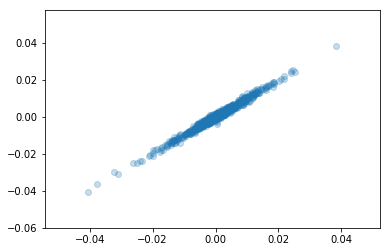

In [31]:
plt.scatter(fake_stock,spy_etf['daily'].iloc[1:],alpha=0.25)

In [32]:
beta,alpha,r_value,p_value,std_err = stats.linregress(
    fake_stock,
    spy_etf['daily'].iloc[1:]
)

In [33]:
beta

0.98738707026805927

In [34]:
alpha

-6.8365598450186244e-06